In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Pandas is used to convert our csv to workable dataframe.
import pandas as pd

# Seabord is an advanced visualising tool, used here , for Heat maps.
import seaborn as sns

# Matplotlib is used to plot data into graphs.
import matplotlib.pyplot as plt

# Using Sklearn to model and retrieve evaluation metrics. 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, f1_score, roc_curve 
from sklearn.metrics import auc, recall_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Importing the cleaned Dataset into a pandas variable called df
df  = pd.read_csv("/content/drive/MyDrive/IDMP PROJECT/Final  Dataset/Final Dataset.csv")

In [ ]:
# Accessing only the genres related columns from the dataframe
genres = df[df.columns[126:146]]

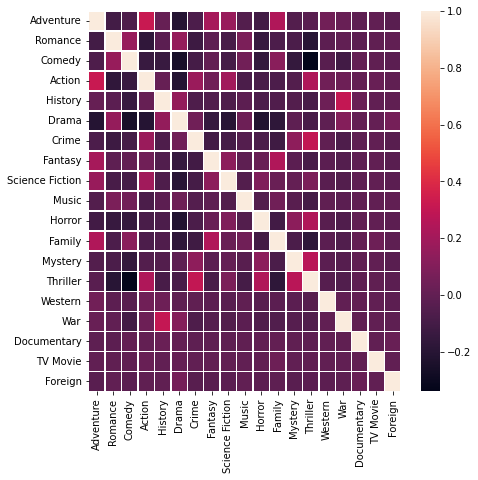

In [ ]:
# Using the matplotlib library to retireve a subplot of size 7x7
fig, ax = plt.subplots(figsize=(7,7))
# Using the Seaborn library to plot the heatmap on our subplot
sns.heatmap(genres.corr(), linewidths=.5, ax=ax)

In [ ]:
# Converting the Bool column "adult" into 1s and 0s
df["adult"].replace(True,'1', inplace=True)
df['adult'].replace(False,'0', inplace=True)

In [ ]:
# Retriving the correlation values of only the target variable
# corr() gives the correlation values of all variables against each other.
# Since df is a pandas dataframe, we use column name(hit/not)
# to retrieve the correlation vlaues relative to that column

cor = df.corr()
cor_tar = cor["hit/not"]

#Using a threshold value of 0.04 we choose the columns only that 
# have correlation greater than threshold

threshold = 0.04
rel_cor = cor_tar[abs(cor_tar) > threshold ]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8992 entries, 0 to 8991
Columns: 147 entries, adult to hit/not
dtypes: float64(4), int64(135), object(8)
memory usage: 10.1+ MB


In [ ]:
# rel_cols only contain those columns that have greater correlation with our 
# target variable.

rel_cols = ["popularity","runtime","vote_count","budget","worlwide_gross_income",
            "weighted_average_vote","United States of America","Germany","France",
            "Italy","Belgium","Netherlands","Luxembourg","Finland","Animation",
            "Adventure","Comedy","Action","Drama","Fantasy","Family","Foreign",
            "hit/not"]
# Filtering out the columns that are irrelevant to our model
non_rel = ["budget"]  #Changed by Madhu. Added "budget" as default column to drop

for col in df.columns:
    if col not in rel_cols:
        non_rel.append(col)
        
# using drop() to drop those columns from our dataframe
df = df.drop(non_rel, axis=1)

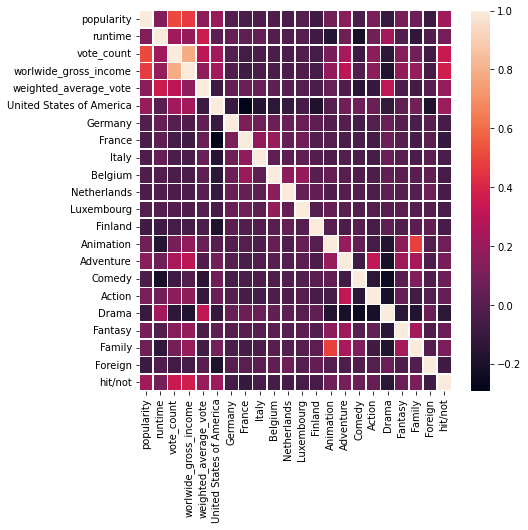

In [ ]:
# creating a Heat map for relevant Columns
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(df.corr(), linewidths=.5, ax=ax)

In [ ]:
## Splitting data into Test and Training set

X = df.iloc[:, :-1:]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [ ]:
# Evaluation Metrics
# Using Sklearns to calculate metrics
# We are calculating accuracy, precision, F1-score, AUC and Specificity
def eval_metrics(y_test, y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=1)
  A = auc(fpr, tpr)
  roc = roc_auc_score(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  specificity = tn / (tn+fp)
  return accuracy*100, precision, recall, f1, A, specificity



Logistic Regression

In [ ]:
# Using Logistic Regression model from Sklearn to model our data.
# Since it is a basic model, the we used mse to calculate error. 

# loading the LogisticRegression module in to lr
lr = LogisticRegression()

# Fitting the model to our train set
lr.fit(x_train, y_train)

# Using the trained model to predict out X_Test
pred = lr.predict(x_test)

# Calculating our evaluation metrics using sklearn build-in package.
acc_lr,precision_lr, rec_lr, f1_lr, areaUnderCurve_lr, spec_lr= eval_metrics(y_test, pred)

# Printing out the Evaluation Metrics 
print(f"The metrics for Logistic regression are: \n Accuracy: {acc_lr}% ",
      f"\nPrecision: {precision_lr} \nRecall: {rec_lr} \nF1 score: {f1_lr} ",
      f"\nArea Under Curve: {areaUnderCurve_lr}  \nSpecificity: {spec_lr}")


The metrics for Logistic regression are: 
 Accuracy: 51.30628126737076%  
Precision: 0.5130628126737076 
Recall: 1.0 
F1 score: 0.6781778104335048  
Area Under Curve: 0.5  
Specificity: 0.0



KNN:


In [ ]:
# Using KneighborsClassifier model from Sklearn to model our data.
# Since it is a basic model, the we used mse to calculate error. 

# loading the KNeighborsClassifier module in to knn
knn = KNeighborsClassifier()

# Fitting the model to our train set
knn.fit(x_train, y_train)

#  Using the trained model to predict out X_Test
y_pred_knn = knn.predict(x_test)

# Calculating our evaluation metrics using sklearn build-in package.
acc_knn, precision_knn, rec_knn, f1_knn, areaUnderCurve_knn, spec_knn = eval_metrics(y_test, y_pred_knn)

# Printing out the Evaluation Metrics 
print(f"The metrics for KNN are: \n Accuracy: {acc_knn}%  \nPrecision: {precision_knn}"+
      f" \nRecall: {rec_knn} \nF1 score: {f1_knn} \nArea Under Curve: {areaUnderCurve_knn}"+
      f" \nSpecificity: {spec_knn}")


The metrics for KNN are: 
 Accuracy: 81.43413007226236%  
Precision: 0.8275862068965517 
Recall: 0.8060671722643553 
F1 score: 0.8166849615806806 
Area Under Curve: 0.8145632664974745 
Specificity: 0.8230593607305936



Decision Tree:

In [ ]:
# Using KneighborsClassifier model from Sklearn to model our data.
# For Decision Tree we take Cross-Entropy Loss as loss function.
# We set that minimum split samples to be 5
# minimum number of leaf nodes is 6
# and we set the max_features to auto to facilitate the model to random skip a few features.
# Random State is set as 50.

# loading the KNeighborsClassifier module in to dt with hyperparameters
dt = tree.DecisionTreeClassifier(criterion='entropy', min_samples_split=5, 
                                 min_samples_leaf=6, max_features='auto', 
                                 random_state=50)

# Fitting the model to our train set
dt.fit(x_train, y_train)

#  Using the trained model to predict out X_Test
y_pred_dt = dt.predict(x_test)

# Calculating our evaluation metrics using sklearn build-in package.
acc_dt, precision_dt, rec_dt, f1_dt, areaUnderCurve_dt, spec_dt = eval_metrics(y_test, y_pred_dt)

# Printing out the Evaluation Metrics 
print(f"The metrics for Decision Tree are: \n Accuracy: {acc_dt}%",
      f" \nPrecision: {precision_dt} \nRecall: {rec_dt} \nF1 score:",
      f" {f1_dt} \nArea Under Curve: {areaUnderCurve_dt}",
      f" \nSpecificity: {spec_dt}")


The metrics for Decision Tree are: 
 Accuracy: 78.76598110061146%  
Precision: 0.794341675734494 
Recall: 0.7908992416034669 
F1 score:  0.7926167209554832 
Area Under Curve: 0.7875729084729665  
Specificity: 0.7842465753424658


Random  Forest


In [ ]:
# Using RandomForestClassifier model from Sklearn to model our data.
# For Random Forest, we take Cross-Entropy Loss as loss function.
# We set that minimum split samples to be 5
# minimum number of leaf nodes is 6
# and we set the max_features to auto to facilitate the model to random skip a few features.
# Random State is set as 50.

# loading the KNeighborsClassifier module in to rf with hyperparameters
rf = RandomForestClassifier(n_estimators=50, 
                            criterion='entropy', min_samples_split=5, 
                            min_samples_leaf=6, max_features='auto', 
                            random_state=50)

# Fitting the model to our train set
rf.fit(x_train, y_train)

#  Using the trained model to predict out X_Test
y_pred_rf = rf.predict(x_test)

# Calculating our evaluation metrics using sklearn build-in package.
acc_rf, precision_rf, rec_rf, f1_rf, areaUnderCurve_rf, spec_rf = eval_metrics(y_test, y_pred_rf)

# Printing out the Evaluation Metrics 
print(f"The metrics for Random Forest are: \n Accuracy: {acc_rf}%"+
      f" \nPrecision: {precision_rf} \nRecall: {rec_rf} \nF1 score: {f1_rf} "+
      f"\nArea Under Curve: {areaUnderCurve_rf} \nSpecificity: {areaUnderCurve_rf}")



The metrics for Random Forest are: 
 Accuracy: 85.71428571428571% 
Precision: 0.8675496688741722 
Recall: 0.8515709642470206 
F1 score: 0.8594860579551667 
Area Under Curve: 0.8572923314385789 
Specificity: 0.8572923314385789
